In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statistics as st
from scipy.stats import iqr

# Importing the csv data and exploring the data structure
ssdf = pd.read_csv("superstore_data.csv")
ssdf.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2021-152156,11/8/2021,11/11/2021,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2021-152156,11/8/2021,11/11/2021,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2021-138688,6/12/2021,6/16/2021,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2020-108966,10/11/2020,10/18/2020,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2020-108966,10/11/2020,10/18/2020,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
# Let's see if there's a linear relationship between sales and profit

# Loading the necessary library
import statsmodels.formula.api as smf

# Create a model and save it to the object
model1 = smf.ols("Sales ~ Profit", data = ssdf).fit()

# Visualize the summary/output of the regression
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     2976.
Date:                Fri, 29 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:55:05   Log-Likelihood:                -77188.
No. Observations:                9994   AIC:                         1.544e+05
Df Residuals:                    9992   BIC:                         1.544e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    193.3336      5.513     35.066      0.0

<Axes: title={'center': 'Relationship Between Sales & Profit'}, xlabel='Sales', ylabel='Profit'>

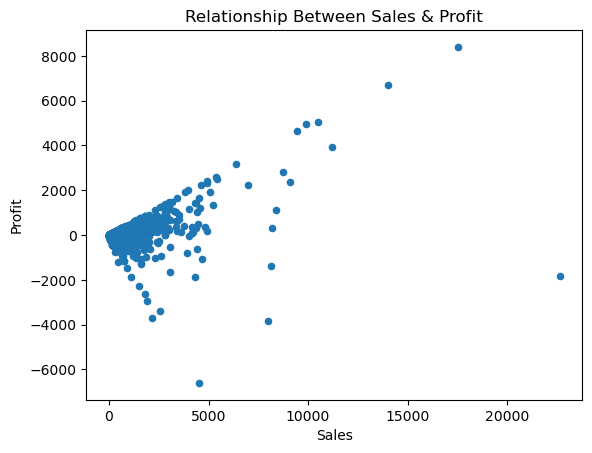

In [3]:
# R-squared value of .23; no relationship suggested between selling higher priced items and getting more profit from it. 
# Let's visualize it as a scatterplot anyways just to be sure =) 

ssdf.plot(x="Sales",y="Profit",kind="scatter",title="Relationship Between Sales & Profit") #scatter plot

# Interesting..  the scatter plot would actually tend to visually suggest a relationship.  
# It could be that the outliers are throwing off the linear regression model.

In [4]:
# Identifying outliers..

# a data point is an outlier if: 
    # data point < Q1 - 1.5 * IQR (inter quartile range (ie distance between 1st and 3rd quartiles or height of box plot))
    # data point > Q3 + 1.5 * IQR

# Calculate total sales by profit
sales_outlier_hunt = ssdf['Sales']


# calculating iqr
q1 = np.quantile(sales_outlier_hunt,0.25)
q3 = np.quantile(sales_outlier_hunt,0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
print(lower)
print(upper)

# Subset emissions_by_country to find outliers
outliers = sales_outlier_hunt[(sales_outlier_hunt < lower) | (sales_outlier_hunt > upper)]
print(outliers)

-271.71000000000004
498.93
1        731.9400
3        957.5775
7        907.1520
10      1706.1840
11       911.4240
          ...    
9931     683.3320
9942     998.8200
9947    1925.8800
9948    2405.2000
9968     735.9800
Name: Sales, Length: 1167, dtype: float64


<Axes: title={'center': 'Relationship Between Sales & Profit'}, xlabel='Sales', ylabel='Profit'>

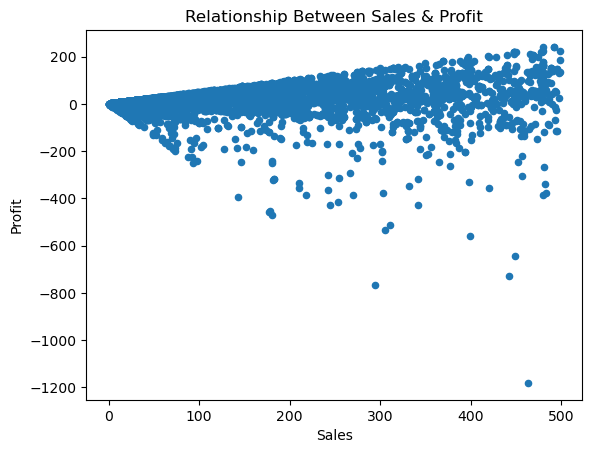

In [5]:
# Bingo!  We've found our outliers.  
# Now, let's see if the relationship exists without the presence of the outliers 

# We'll start by creating a new subset of the data that filters out the outliers
ssdf_filtered = ssdf[(ssdf["Sales"] < upper) & (ssdf["Sales"] > lower)]
# Now plot it again
ssdf_filtered.plot(x="Sales",y="Profit",kind="scatter",title="Relationship Between Sales & Profit") #scatter plot

In [6]:
# Let's create a new model and save it to the object
model2 = smf.ols("Sales ~ Profit", data = ssdf_filtered).fit()

# Visualize the summary/output of the regression
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     354.2
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           1.64e-77
Time:                        16:56:37   Log-Likelihood:                -54161.
No. Observations:                8827   AIC:                         1.083e+05
Df Residuals:                    8825   BIC:                         1.083e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     87.7515      1.221     71.875      0.0

# Surprisingly, that actually weakened the relationship to .084.  Looks like there is absolutely no relationship between sale price and profit